In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

# get the output for all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from scipy import stats

## Load the data

In [2]:
df = pd.read_csv(r"C:\data\churn_dataset.csv",skipinitialspace=True)

In [3]:
+df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
mean = df.TotalCharges.mean()

In [6]:
mean

2283.3004408418697

In [7]:
df.TotalCharges.replace(np.nan,mean,inplace=True)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

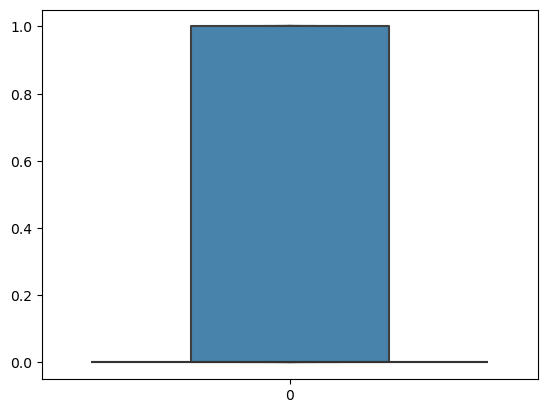

In [10]:
sns.boxenplot(df.SeniorCitizen);

## IQR method to identify the out layers

In [11]:
Q1,Q2,Q3=tuple(df.MonthlyCharges.quantile(q=[0.25,0.50,0.75]).values)
IQR=round((Q3-Q1),2)
UL = round((Q3+1.5*IQR),2)
LL = round((Q1-1.5*IQR),2)
Q1,Q2,Q3

(35.5, 70.35, 89.85)

## a. Identify the Target Variable and Splitting the Data into Train and Test

In [12]:
import sklearn
print(sklearn.__version__)

1.2.1


In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
type(df)

pandas.core.frame.DataFrame

In [15]:
# Identifying the inputs (X) and output (y)

y = df['Churn']

X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [16]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [213]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
877,Female,0,No,Yes,51,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),60.15,3077.00
5792,Female,1,No,No,15,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,96.30,1426.75
5334,Female,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20
878,Female,0,No,No,60,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,One year,No,Electronic check,64.75,4039.50
6578,Female,0,No,Yes,10,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.55,693.30


In [214]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(4930, 19) (4930,)
(2113, 19) (2113,)


## b. Separating Categorical and Numerical Columns:

In [215]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
877,Female,0,No,Yes,51,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),60.15,3077.00
5792,Female,1,No,No,15,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,96.30,1426.75
5334,Female,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20
878,Female,0,No,No,60,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,One year,No,Electronic check,64.75,4039.50
6578,Female,0,No,Yes,10,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.55,693.30


In [216]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [217]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
877,Female,No,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic)
5792,Female,No,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check
5334,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
878,Female,No,No,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,One year,No,Electronic check
6578,Female,No,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,One year,No,Credit card (automatic)


In [218]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
877,0,51,60.15,3077.00
5792,1,15,96.30,1426.75
5334,0,49,107.95,5293.20
878,0,60,64.75,4039.50
6578,0,10,73.55,693.30


## c. Scaling the Numerical Features

In [219]:
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
877,0,51,60.15,3077.00
5792,1,15,96.30,1426.75
5334,0,49,107.95,5293.20
878,0,60,64.75,4039.50
6578,0,10,73.55,693.30


In [220]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
877,-0.438147,0.754422,-0.145568,0.349279
5792,2.282338,-0.710751,1.051796,-0.380396
5334,-0.438147,0.673024,1.437668,1.329194
878,-0.438147,1.120716,0.006794,0.774858
6578,-0.438147,-0.914247,0.298268,-0.704699


In [221]:
X_train_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,4930.000000,4930.000000,4930.000000,4930.000000
mean,0.161055,32.463489,64.544888,2287.063327
std,0.367619,24.572960,30.194394,2261.853226
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,34.800000,405.712500
50%,0.000000,29.000000,70.300000,1405.650000
75%,0.000000,56.000000,89.700000,3795.212500
max,1.000000,72.000000,118.600000,8670.100000


In [222]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
Mean of each column: [1.61054767e-01 3.24634888e+01 6.45448884e+01 2.28706333e+03]
Std of each column: [3.67581459e-01 2.45704680e+01 3.01913319e+01 2.26162382e+03]


## d. Applying OneHotEncoding on Categorical Columns

In [223]:
X_train_cat['gender'].value_counts(normalize=True)

Male      0.503854
Female    0.496146
Name: gender, dtype: float64

In [224]:
X_train_cat['Partner'].value_counts(normalize=True)

No     0.522718
Yes    0.477282
Name: Partner, dtype: float64

In [225]:
X_train_cat['Dependents'].value_counts(normalize=True)

No     0.697972
Yes    0.302028
Name: Dependents, dtype: float64

In [226]:
X_train_cat['PhoneService'].value_counts(normalize=True)

Yes    0.902637
No     0.097363
Name: PhoneService, dtype: float64

In [227]:
X_train_cat['MultipleLines'].value_counts(normalize=True)

No                  0.481542
Yes                 0.421095
No phone service    0.097363
Name: MultipleLines, dtype: float64

In [228]:
X_train_cat['InternetService'].value_counts(normalize=True)

Fiber optic    0.436105
DSL            0.341176
No             0.222718
Name: InternetService, dtype: float64

In [229]:
X_train_cat['OnlineSecurity'].value_counts(normalize=True)

No                     0.490467
Yes                    0.286815
No internet service    0.222718
Name: OnlineSecurity, dtype: float64

In [230]:
X_train_cat['OnlineBackup'].value_counts(normalize=True)

No                     0.429615
Yes                    0.347667
No internet service    0.222718
Name: OnlineBackup, dtype: float64

In [231]:
X_train_cat['DeviceProtection'].value_counts(normalize=True)

No                     0.436105
Yes                    0.341176
No internet service    0.222718
Name: DeviceProtection, dtype: float64

In [232]:
X_train_cat['TechSupport'].value_counts(normalize=True)

No                     0.484178
Yes                    0.293103
No internet service    0.222718
Name: TechSupport, dtype: float64

In [233]:
X_train_cat['StreamingTV'].value_counts(normalize=True)

No                     0.393103
Yes                    0.384178
No internet service    0.222718
Name: StreamingTV, dtype: float64

In [234]:
X_train_cat['StreamingMovies'].value_counts(normalize=True)

Yes                    0.389249
No                     0.388032
No internet service    0.222718
Name: StreamingMovies, dtype: float64

In [235]:
X_train_cat['Contract'].value_counts(normalize=True)

Month-to-month    0.544016
Two year          0.245233
One year          0.210751
Name: Contract, dtype: float64

In [236]:
X_train_cat['PaperlessBilling'].value_counts(normalize=True)

Yes    0.592698
No     0.407302
Name: PaperlessBilling, dtype: float64

In [237]:
X_train_cat['PaymentMethod'].value_counts(normalize=True)

Electronic check             0.335497
Mailed check                 0.229412
Bank transfer (automatic)    0.219878
Credit card (automatic)      0.215213
Name: PaymentMethod, dtype: float64

In [238]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
877,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5792,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5334,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
878,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6578,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [239]:
encoder_.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

## e. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [240]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
877,-0.438147,0.754422,-0.145568,0.349279,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5792,2.282338,-0.710751,1.051796,-0.380396,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5334,-0.438147,0.673024,1.437668,1.329194,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
878,-0.438147,1.120716,0.006794,0.774858,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6578,-0.438147,-0.914247,0.298268,-0.704699,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


## f. Preparing Test Data

In [241]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4880,Male,0,Yes,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.55,1067.65
1541,Male,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1434.10
1289,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35
5745,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.20
4873,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,144.95


In [242]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 4880 to 3625
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2113 non-null   object 
 1   SeniorCitizen     2113 non-null   int64  
 2   Partner           2113 non-null   object 
 3   Dependents        2113 non-null   object 
 4   tenure            2113 non-null   int64  
 5   PhoneService      2113 non-null   object 
 6   MultipleLines     2113 non-null   object 
 7   InternetService   2113 non-null   object 
 8   OnlineSecurity    2113 non-null   object 
 9   OnlineBackup      2113 non-null   object 
 10  DeviceProtection  2113 non-null   object 
 11  TechSupport       2113 non-null   object 
 12  StreamingTV       2113 non-null   object 
 13  StreamingMovies   2113 non-null   object 
 14  Contract          2113 non-null   object 
 15  PaperlessBilling  2113 non-null   object 
 16  PaymentMethod     2113 non-null   objec

In [243]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4880,Male,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1541,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
1289,Male,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
5745,Female,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check
4873,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check


In [244]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4880,0,50,20.55,1067.65
1541,0,72,19.85,1434.10
1289,0,63,68.80,4111.35
5745,0,61,24.20,1445.20
4873,0,7,19.30,144.95


In [245]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4880,-0.438147,0.713723,-1.457203,-0.539176
1541,-0.438147,1.609107,-1.480388,-0.377146
1289,-0.438147,1.242814,0.140938,0.806627
5745,-0.438147,1.161415,-1.336307,-0.372238
4873,-0.438147,-1.036345,-1.498605,-0.947157


In [246]:
#encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1541,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1289,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5745,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4873,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [247]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,-0.438147,0.713723,-1.457203,-0.539176,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1541,-0.438147,1.609107,-1.480388,-0.377146,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1289,-0.438147,1.242814,0.140938,0.806627,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5745,-0.438147,1.161415,-1.336307,-0.372238,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4873,-0.438147,-1.036345,-1.498605,-0.947157,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Logistic Regression

In [248]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train_transformed, y_train)

LogisticRegression()

In [249]:
y_test_pred = logistic.predict(X_test_transformed)

In [250]:
# Checking the actual values and Predicted values

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


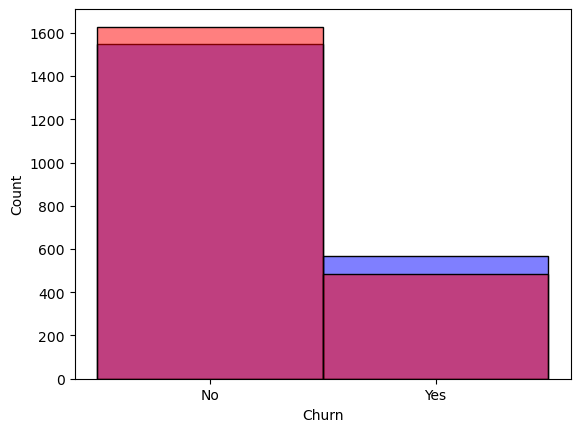

In [251]:
# Histplot Between actual values and predicted values

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## KNN classification

In [252]:
from sklearn.neighbors import KNeighborsClassifier
classification = KNeighborsClassifier()
classification.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [253]:
y_test_pred = classification.predict(X_test_transformed)

In [254]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


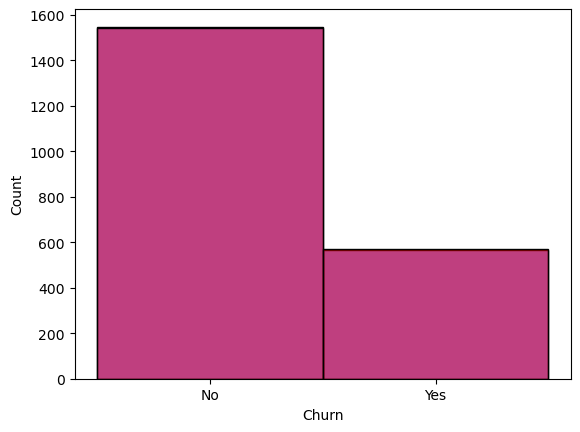

In [255]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## Decision Tree Classification

In [256]:
from sklearn.tree import DecisionTreeClassifier
classification = DecisionTreeClassifier()
classification.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [257]:
y_test_pred = classification.predict(X_test_transformed)

In [258]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


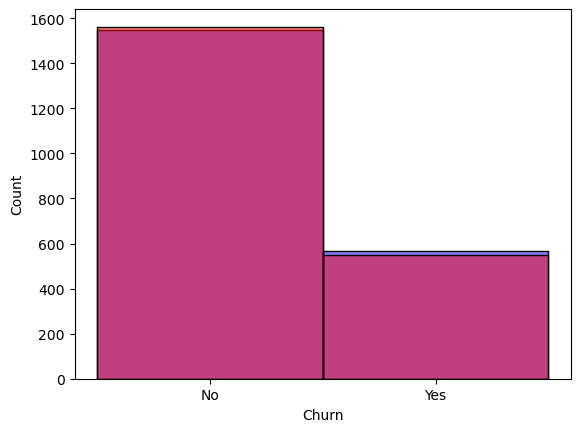

In [259]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## Random Forest Classification

In [260]:
from sklearn.ensemble import RandomForestClassifier
classification = RandomForestClassifier()
classification.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [261]:
y_test_pred = classification.predict(X_test_transformed)

In [262]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


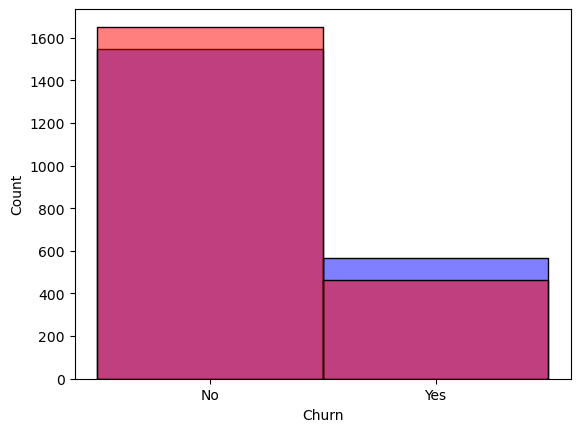

In [263]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## Evaluation

In [264]:
# calculate accuracy of class predictions
from sklearn import metrics

a = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy ;',a)

Accuracy ; 0.7851396119261713


## Training - Support Vector Classifier

In [265]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

b = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy ;',b)

SVC()

Accuracy ; 0.7827733080927591


## Training - KNN Classifier

In [266]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

c = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy ;',c)

KNeighborsClassifier()

Accuracy ; 0.7539044013251301


## Training - DT Classifier

In [267]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

d = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy ;',d)

DecisionTreeClassifier()

Accuracy ; 0.735447231424515


## Gradient Boosting Decision Tree Clasifier

In [268]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

f = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy ;',f)

GradientBoostingClassifier()

Accuracy ; 0.7898722195929957


## Adaptive Boosting Clasifier

In [269]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

g = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy ;',g)

AdaBoostClassifier()

Accuracy ; 0.7903454803596782


## Training - Ramdom Forest Classifier

In [270]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

e = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy ;',e)

RandomForestClassifier()

Accuracy ; 0.7884524372929484


In [271]:
print(round((a*100),2),'%', sep = '')
str(round((a*100),2))+'%'

78.51%


'78.51%'

In [301]:
df_data = [['Logistic Regression', a, str(round((a*100),2))+'%'],
                 ['Decision Tree Classifier',d,str(round((d*100),2))+'%'],
                 ['Support Vector Classifier',b,str(round((b*100),2))+'%'],
                 ['Random Forest Classifier ',e,str(round((e*100),2))+'%'],
              ['Gradient Boosting Decision Tree Clasifier', f,str(round((f*100),2))+'%'],
            ['Adaptive Boosting Clasifier', g,str(round((g*100),2))+'%'],
            ['k-Nearest nebhiour',c,str(round((c*100),2))+'%']]

data = pd.DataFrame(df_data, columns = ['Algorithm','Accuracy','Accuracy %'])

In [302]:
data

,Algorithm,Accuracy,Accuracy %
0,Logistic Classifier,0.785140,78.51%
1,Decision Tree Classifier,0.735447,73.54%
2,Support Vector Classifier,0.782773,78.28%
3,Random Forest Classifier,0.788452,78.85%
4,Gradient Boosting Decision Tree Clasifier,0.789872,78.99%
5,Adaptive Boosting Clasifier,0.790345,79.03%
6,k-Nearest nebhiour,0.753904,75.39%


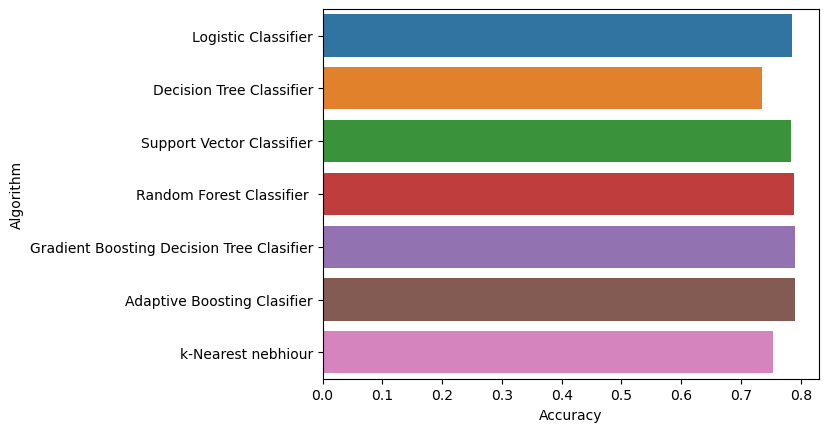

In [303]:
sns.barplot(x=data["Accuracy"],y=data["Algorithm"]);


# conclusion

## By observing the above values `Adaptive Boosting Clasifier` is a best way to solve `churn` prediction 